## <font color=Yellow size=20>Manjeel Chalise
KCE080BCT015
</script>

# Wine Quality Prediction 

##  Objective: Predict the quality of wine on a scale (e.g., 0 to 10) based on physicochemical properties such as acidity, pH, alcohol content, and sugar levels.

## Source:https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

In [443]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler




In [444]:
df2=pd.read_csv("winequality-red.csv")
df1=pd.read_csv("winequality-white.csv",sep=';')


In [445]:
print(df2.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [446]:
print(df1.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [447]:
df = pd.concat([df2, df1], ignore_index=True)

In [448]:
df.columns



Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [449]:
df.shape

(6497, 12)

In [450]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [451]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [453]:
# Remove duplicate rows, ignoring the 'Id' column
df = df.drop_duplicates(subset=df.columns.difference(['Id']), keep='first')

print(f"Dataset after removing duplicates: {df.shape[0]} rows")


Dataset after removing duplicates: 5318 rows


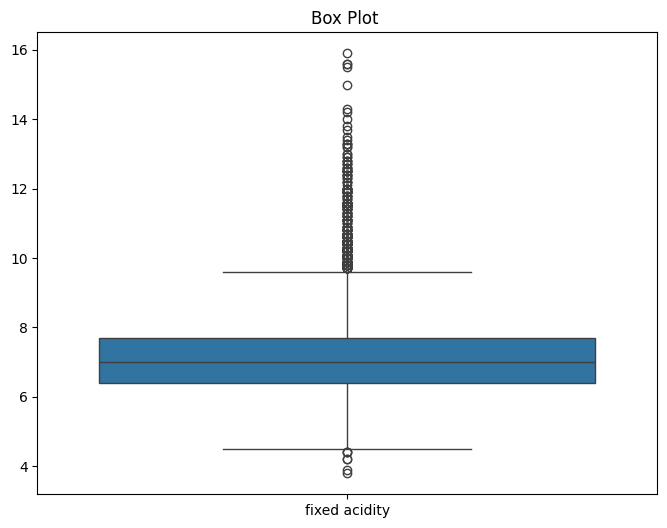

In [454]:
first_f = ['fixed acidity']

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[first_f])
plt.title("Box Plot ")
plt.show()

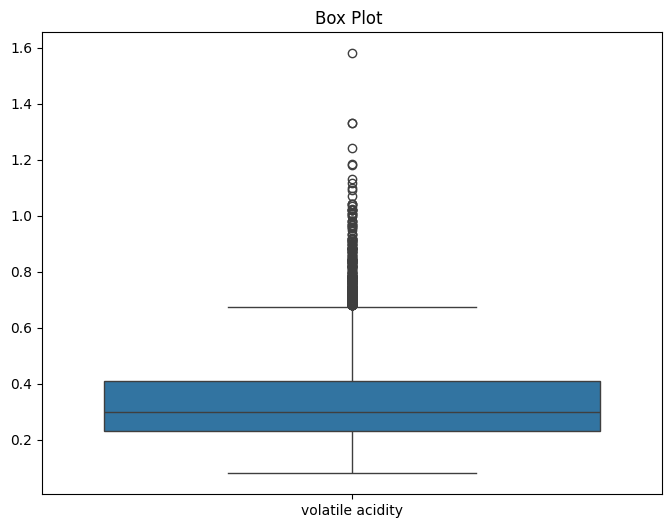

In [455]:
second_four = ['volatile acidity']

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[second_four])
plt.title("Box Plot ")
plt.show()

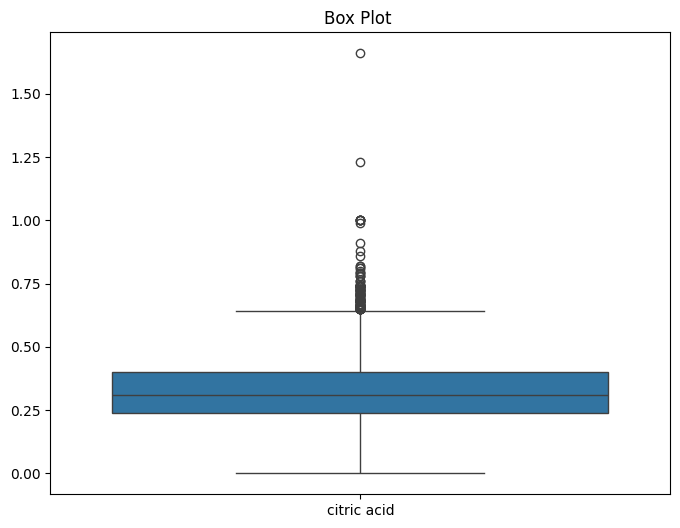

In [456]:
second_four1 = ['citric acid']

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[second_four1])
plt.title("Box Plot ")
plt.show()

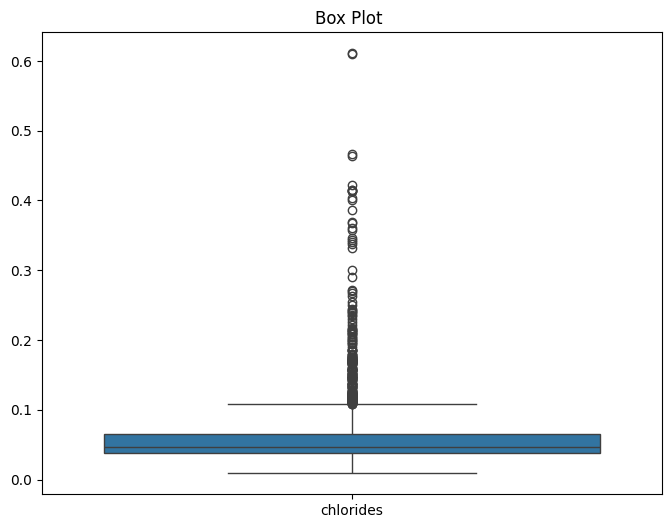

In [457]:
second_four1 = ['chlorides']

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[second_four1])
plt.title("Box Plot ")
plt.show()

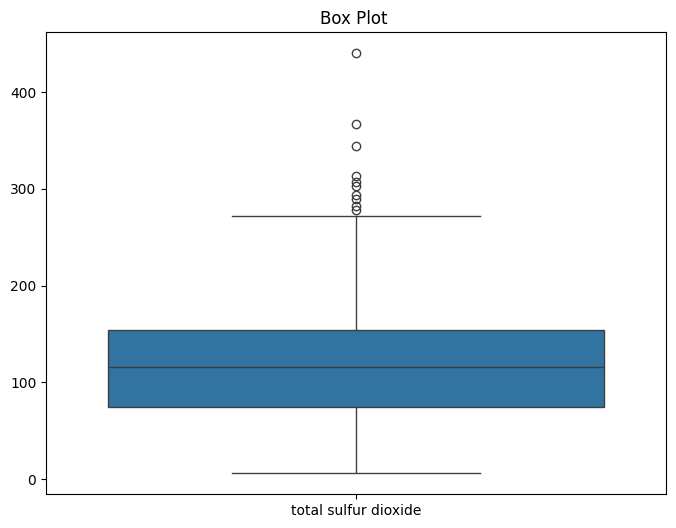

In [458]:
second_four1 = ['total sulfur dioxide']

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[second_four1])
plt.title("Box Plot ")
plt.show()

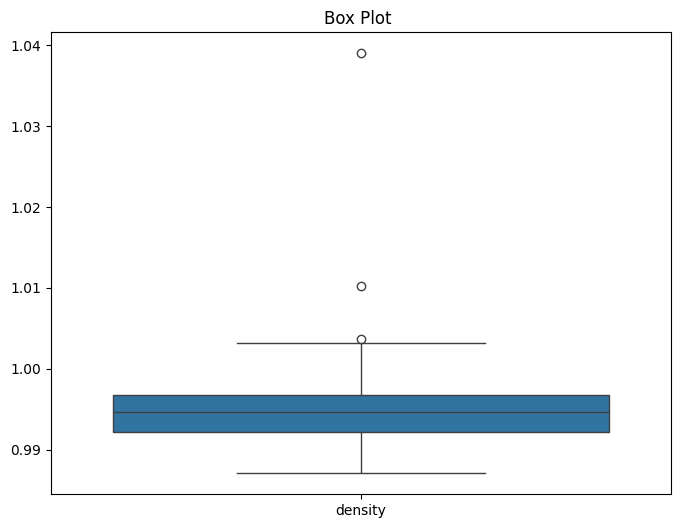

In [459]:
second_four1 = ['density']

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[second_four1])
plt.title("Box Plot ")
plt.show()

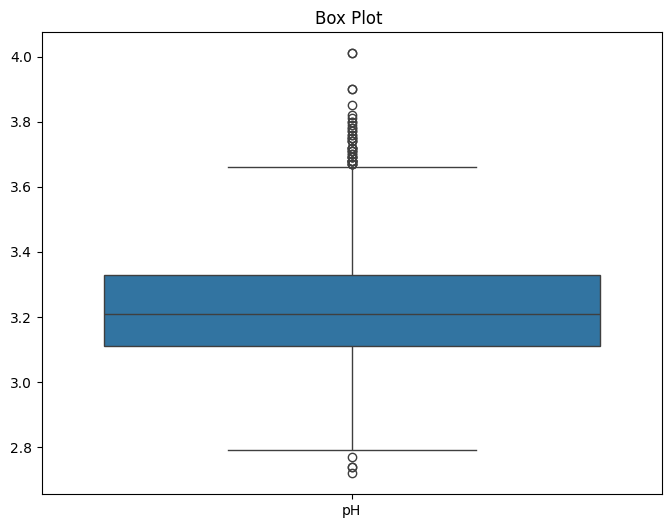

In [460]:
second_four1 = ['pH']

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[second_four1])
plt.title("Box Plot ")
plt.show()

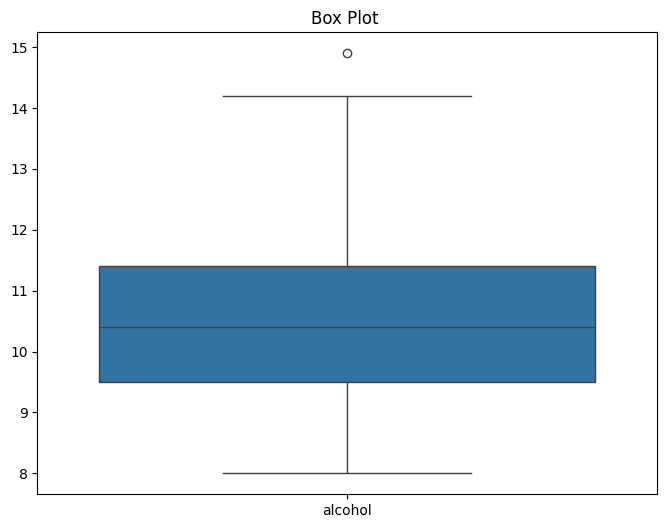

In [461]:
second_four1 = ['alcohol']

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[second_four1])
plt.title("Box Plot ")
plt.show()

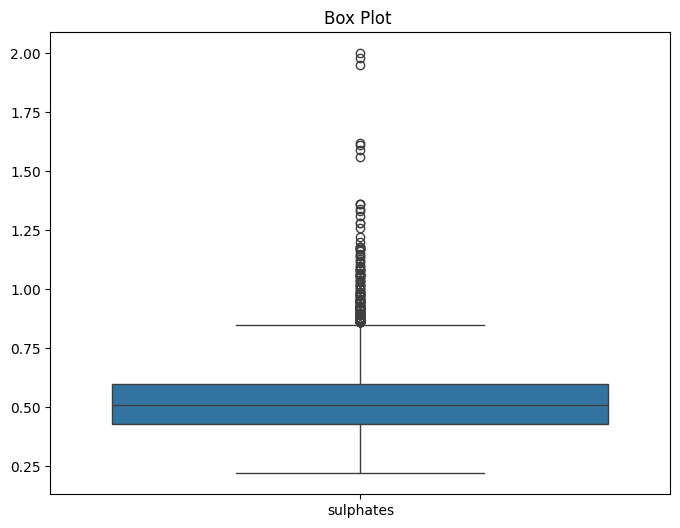

In [462]:
second_four1 = ['sulphates']

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[second_four1])
plt.title("Box Plot ")
plt.show()

In [463]:

z_scores = df.apply(zscore)
outliers = (abs(z_scores) > 3).sum()

print("Number of outliers in each column:\n", outliers)

Number of outliers in each column:
 fixed acidity           108
volatile acidity         77
citric acid              23
residual sugar           42
chlorides                94
free sulfur dioxide      27
total sulfur dioxide      8
density                   3
pH                       32
sulphates                63
alcohol                   2
quality                  35
dtype: int64


In [464]:
features_to_treat = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                     'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                     'pH', 'sulphates', 'alcohol']

# Calculate Z-scores for the selected features
z_scores = zscore(df[features_to_treat])

# Convert Z-scores to DataFrame
z_df = pd.DataFrame(z_scores, columns=features_to_treat)

# Define the Z-score threshold for outliers
outlier_threshold = 3

# Identify outliers where Z-score > 3 or < -3
outliers = (z_df > outlier_threshold) | (z_df < -outlier_threshold)

# Count outliers in each column
outlier_counts = outliers.sum()
print("Outlier counts in each column:")
print(outlier_counts)

# Fixing outliers: Replace outliers with the median of each column
for col in features_to_treat:
    median_value = df[col].median()
    df[col] = df[col].where(~outliers[col], median_value)

# Verify the fix (check for any remaining outliers)
z_scores_fixed = zscore(df[features_to_treat])
z_df_fixed = pd.DataFrame(z_scores_fixed, columns=features_to_treat)
outliers_fixed = (z_df_fixed > outlier_threshold) | (z_df_fixed < -outlier_threshold)
print("\nOutlier counts after fixing:")
print(outliers_fixed.sum())

Outlier counts in each column:
fixed acidity           108
volatile acidity         77
citric acid              23
residual sugar           42
chlorides                94
free sulfur dioxide      27
total sulfur dioxide      8
density                   3
pH                       32
sulphates                63
alcohol                   2
dtype: int64

Outlier counts after fixing:
fixed acidity           74
volatile acidity        44
citric acid             41
residual sugar          41
chlorides               78
free sulfur dioxide     15
total sulfur dioxide     0
density                  1
pH                       6
sulphates               39
alcohol                  0
dtype: int64


## Visualization of the quality of wine on a scale

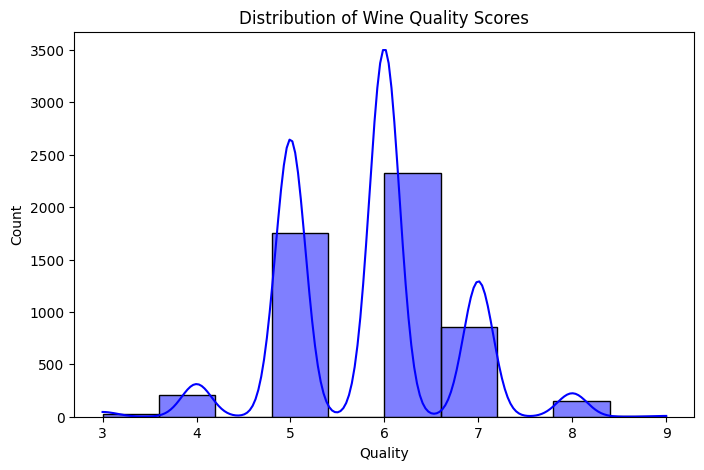

In [465]:
plt.figure(figsize=(8, 5))
sns.histplot(df['quality'], bins=10, kde=True, color='blue')
plt.title("Distribution of Wine Quality Scores")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

## Conversion of the numerical quality scores into three categories: Bad, Average and Excellent


In [466]:
def categorize_quality(q):
    if q <= 5:
        return "Bad"
    elif 5 < q <= 6.5:
        return "Average"
    else:
        return "Excellent"
df['quality_category'] = df['quality'].apply(categorize_quality)
print(df['quality_category'])


0             Bad
1             Bad
2             Bad
3         Average
5             Bad
          ...    
6492      Average
6493          Bad
6494      Average
6495    Excellent
6496      Average
Name: quality_category, Length: 5318, dtype: object


In [467]:
df.shape

(5318, 13)

In [468]:

category_counts = df['quality_category'].value_counts()
print(category_counts)


quality_category
Average      2323
Bad          1987
Excellent    1008
Name: count, dtype: int64


In [469]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Bad
1,7.8,0.30,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Bad
3,7.0,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Average
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,Bad


## Analyzing how the different features affect the quality scores

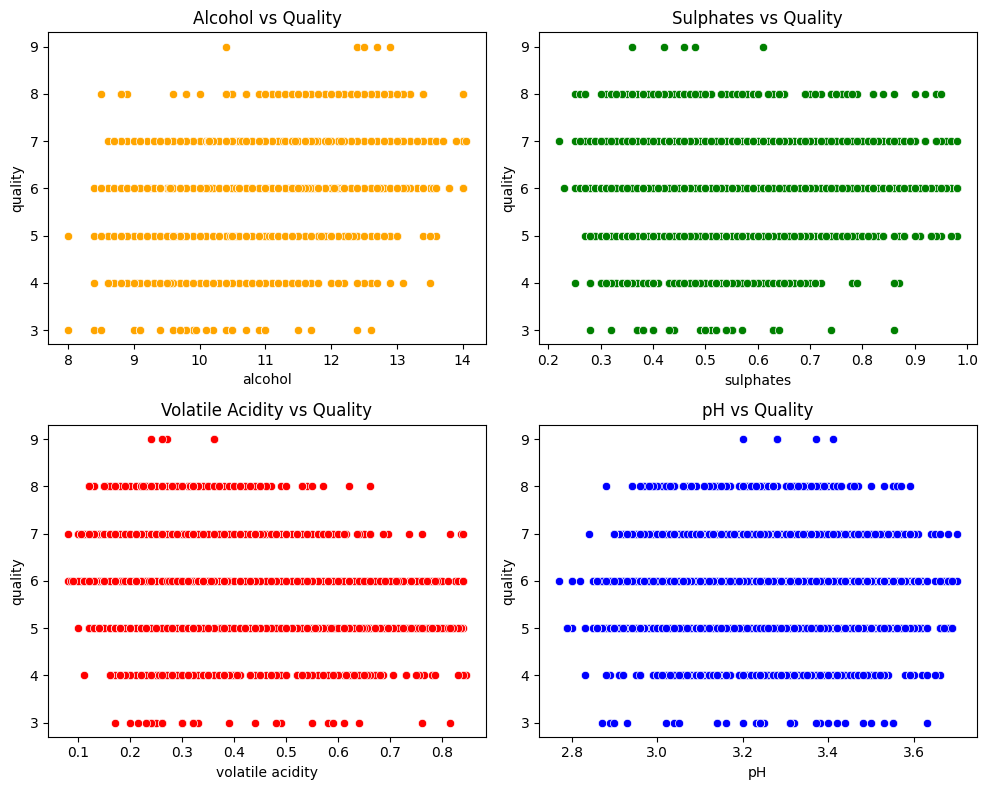

In [470]:
# Plot key features vs. quality
plt.figure(figsize=(10, 8))

# Alcohol vs Quality
plt.subplot(2, 2, 1)
sns.scatterplot(x='alcohol', y='quality', data=df, color='orange')
plt.title('Alcohol vs Quality')

# Sulphates vs Quality
plt.subplot(2, 2, 2)
sns.scatterplot(x='sulphates', y='quality', data=df, color='green')
plt.title('Sulphates vs Quality')

# Volatile Acidity vs Quality
plt.subplot(2, 2, 3)
sns.scatterplot(x='volatile acidity', y='quality', data=df, color='red')
plt.title('Volatile Acidity vs Quality')

# pH vs Quality
plt.subplot(2, 2, 4)
sns.scatterplot(x='pH', y='quality', data=df, color='blue')
plt.title('pH vs Quality')

plt.tight_layout()
plt.show()

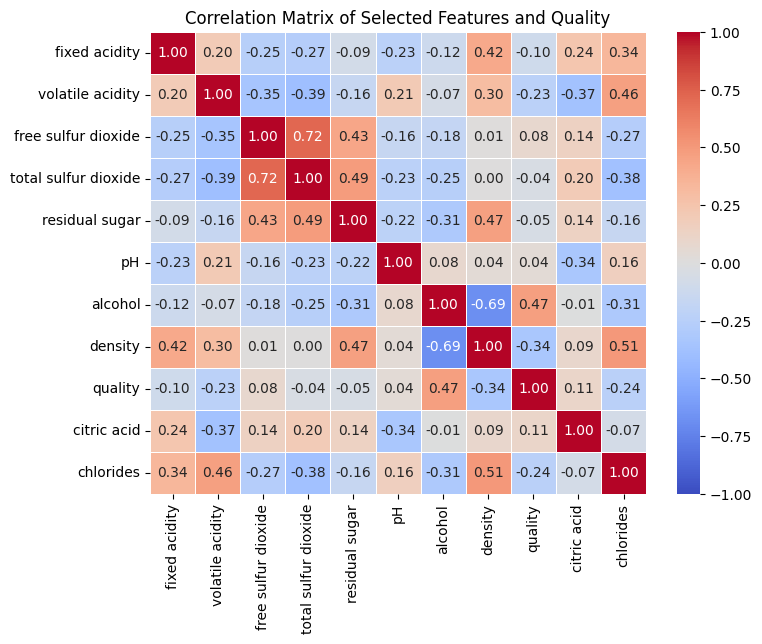

In [471]:

relevant_columns = ['fixed acidity','volatile acidity' ,'free sulfur dioxide','total sulfur dioxide','residual sugar','pH', 'alcohol', 'density', 'quality','citric acid','chlorides']



relevant_data = df[relevant_columns].copy()

corr_matrix = relevant_data.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Selected Features and Quality')
plt.show()


### From the above we can draw conclusions as: 
<font size=2> Alcohol has the highest correlation with quality (0.47), meaning wines with higher alcohol content tend to be of better quality.<br>
Density and alcohol have a strong negative correlation (-0.69), indicating that denser wines usually have lower alcohol content.<br>
Total sulfur dioxide and free sulfur dioxide are highly correlated (0.72), which means one of them could be removed to avoid redundancy.<br>
Chlorides and volatile acidity have a moderate correlation with quality, but it's weaker than alcohol.<br>
Citric acid and pH have very low correlation with quality, meaning they might not be strong predictors.<br>
</font>

## Visualization of pairwise relationship between the different features:fixed acidity,ph,alcohol,density

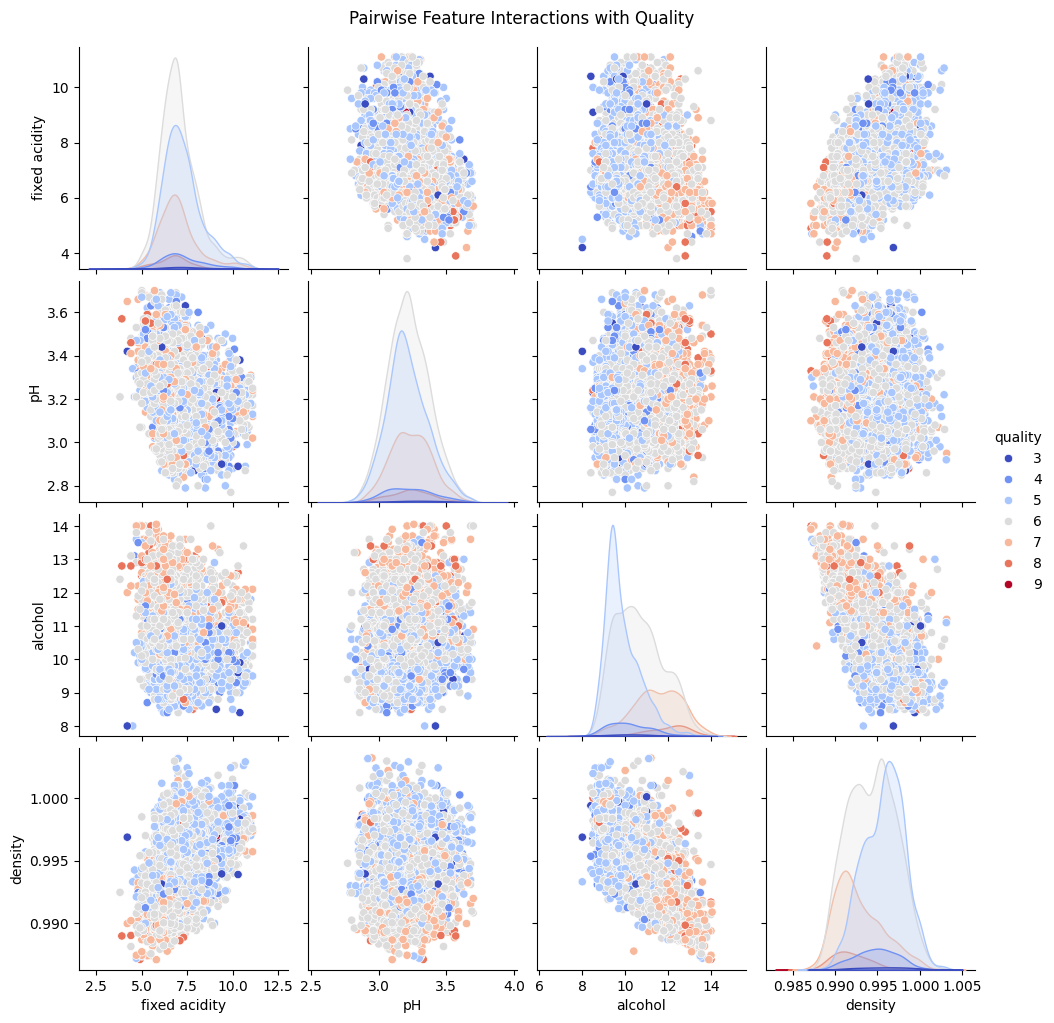

In [472]:

sns.pairplot(df[['fixed acidity', 'pH', 'alcohol', 'density', 'quality']], hue='quality', palette='coolwarm')
plt.suptitle('Pairwise Feature Interactions with Quality', y=1.02)
plt.show()


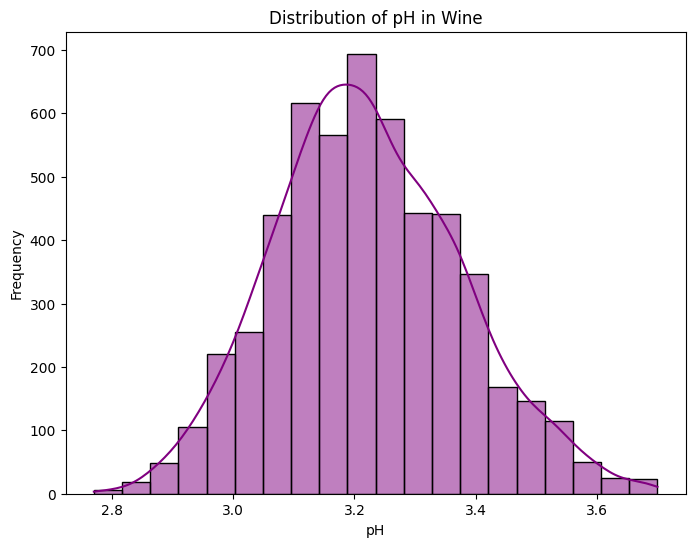

In [473]:
# Histogram to visualize pH distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['pH'], kde=True, color='purple', bins=20)
plt.title('Distribution of pH in Wine')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.show()


In [474]:
print(df['pH'])

0       3.51
1       3.20
2       3.26
3       3.16
5       3.51
        ... 
6492    3.27
6493    3.15
6494    2.99
6495    3.34
6496    3.26
Name: pH, Length: 5318, dtype: float64


## Acidity composition in the wine(Visualization)

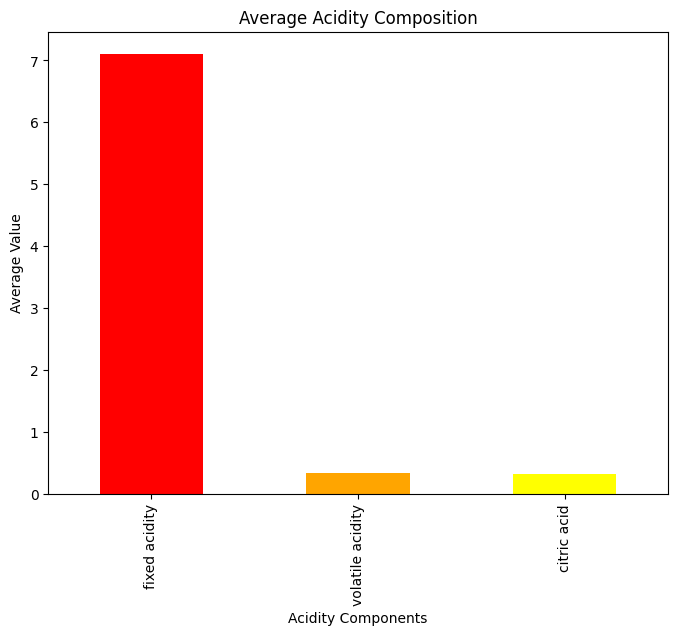

In [475]:
# Bar plot for acidity components
df[['fixed acidity', 'volatile acidity', 'citric acid']].mean().plot(kind='bar', color=['red', 'orange', 'yellow'], figsize=(8, 6))
plt.title('Average Acidity Composition')
plt.xlabel('Acidity Components')
plt.ylabel('Average Value')
plt.show()


## Free sulphur vs total sulfur comparison

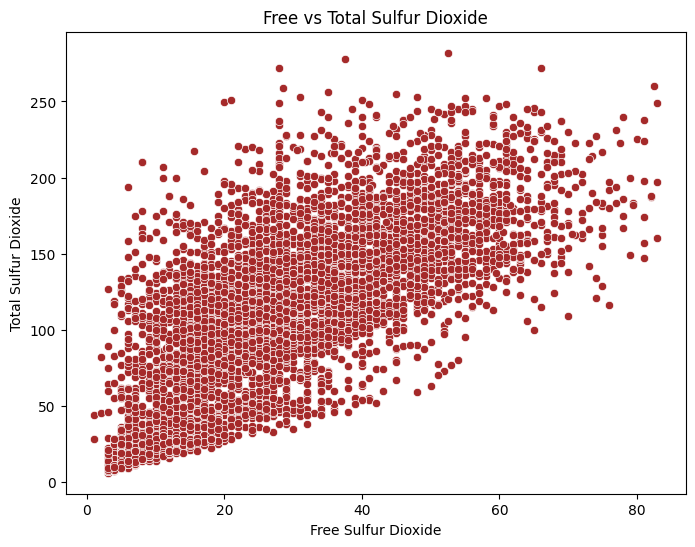

In [476]:
# Scatter plot of free vs total sulfur dioxide
plt.figure(figsize=(8, 6))
sns.scatterplot(x='free sulfur dioxide', y='total sulfur dioxide', data=df, color='brown')
plt.title('Free vs Total Sulfur Dioxide')
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Total Sulfur Dioxide')
plt.show()


## Density vs Sugar analysis

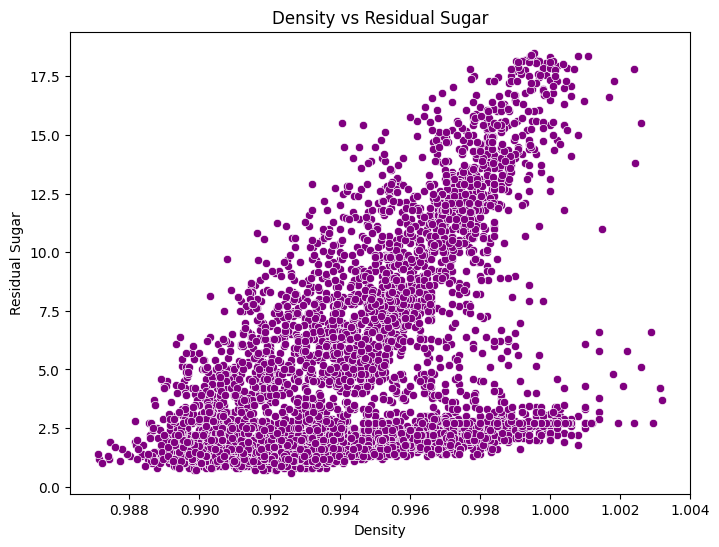

In [477]:
# Scatter plot of density vs residual sugar
plt.figure(figsize=(8, 6))
sns.scatterplot(x='density', y='residual sugar', data=df, color='purple')
plt.title('Density vs Residual Sugar')
plt.xlabel('Density')
plt.ylabel('Residual Sugar')
plt.show()


## Alcohol vs Density visualization

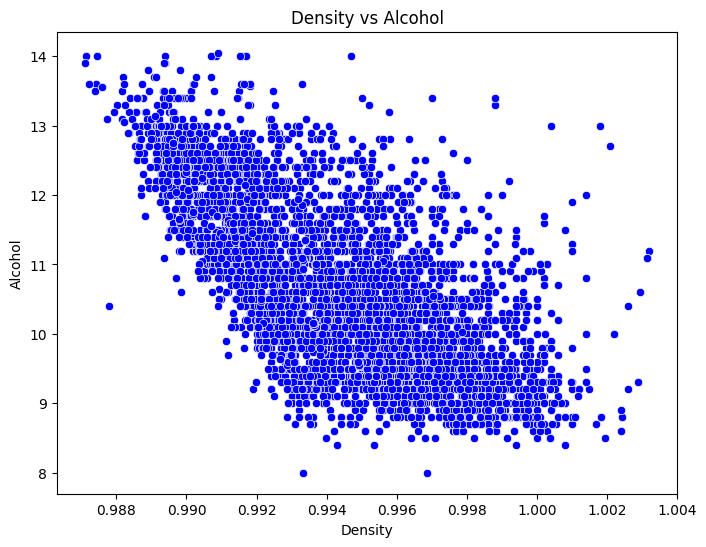

In [478]:
# Scatter plot of density vs alcohol
plt.figure(figsize=(8, 6))
sns.scatterplot(x='density', y='alcohol', data=df, color='blue')
plt.title('Density vs Alcohol')
plt.xlabel('Density')
plt.ylabel('Alcohol')
plt.show()


### The above graph shows that the higher the alcohol level, the lower is the density level

## Feature Engineering

### Introduction of new features like Acidity Ratio, Sulphur Balance and Sugar-Alcohol Ratio.

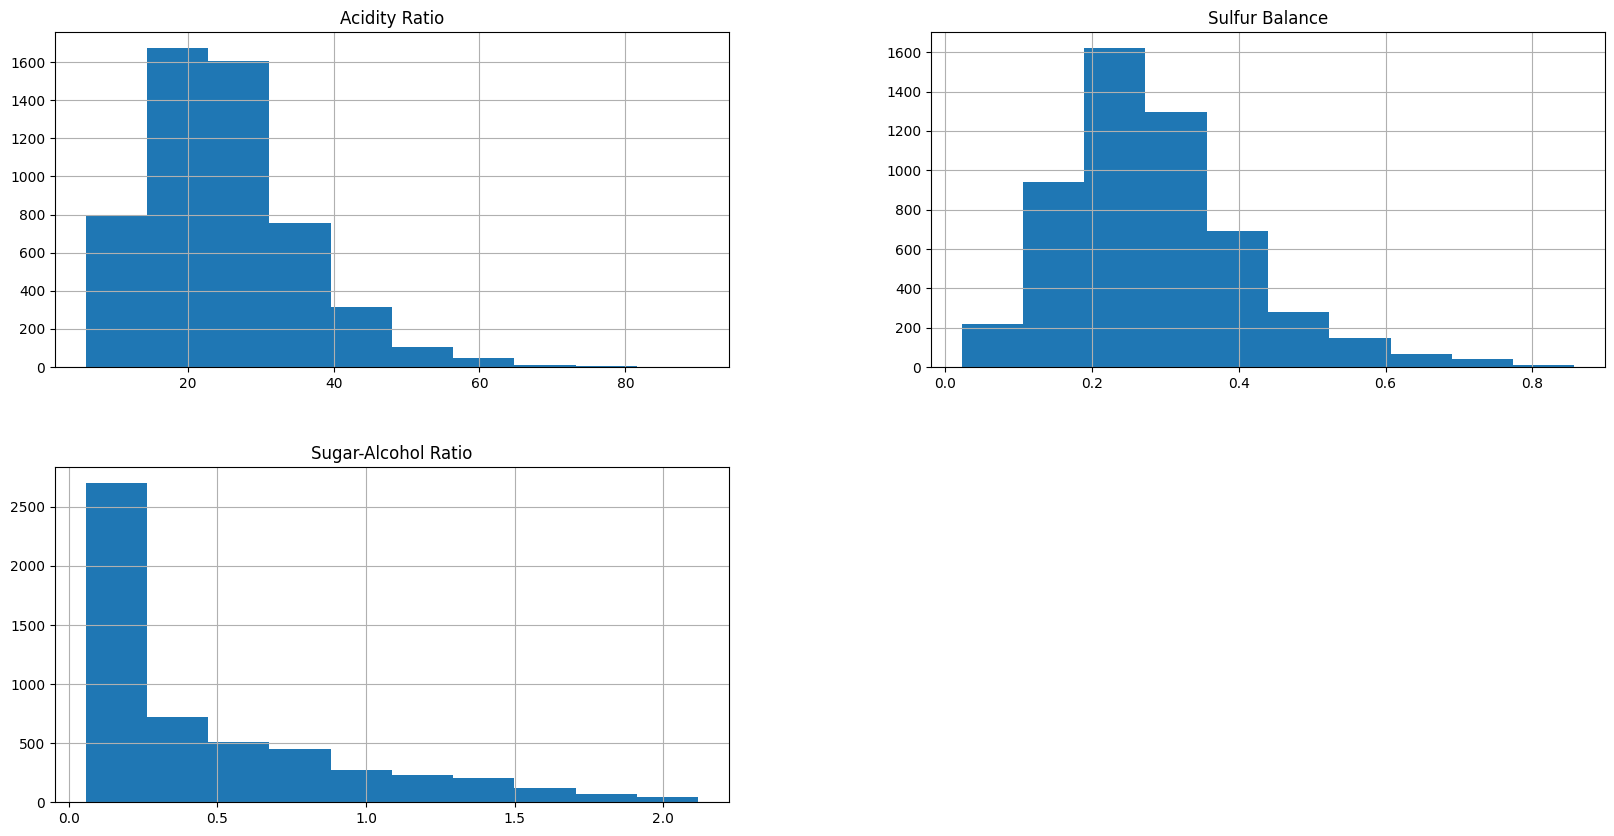

In [479]:
# Feature Engineering
df['Acidity Ratio'] = df['fixed acidity'] / df['volatile acidity']
df['Sulfur Balance'] = df['free sulfur dioxide'] / df['total sulfur dioxide']
df['Sugar-Alcohol Ratio'] = df['residual sugar'] / df['alcohol']

# Plot the new features
df[['Acidity Ratio', 'Sulfur Balance', 'Sugar-Alcohol Ratio']].hist(figsize=(20, 10), bins=10)
plt.show()


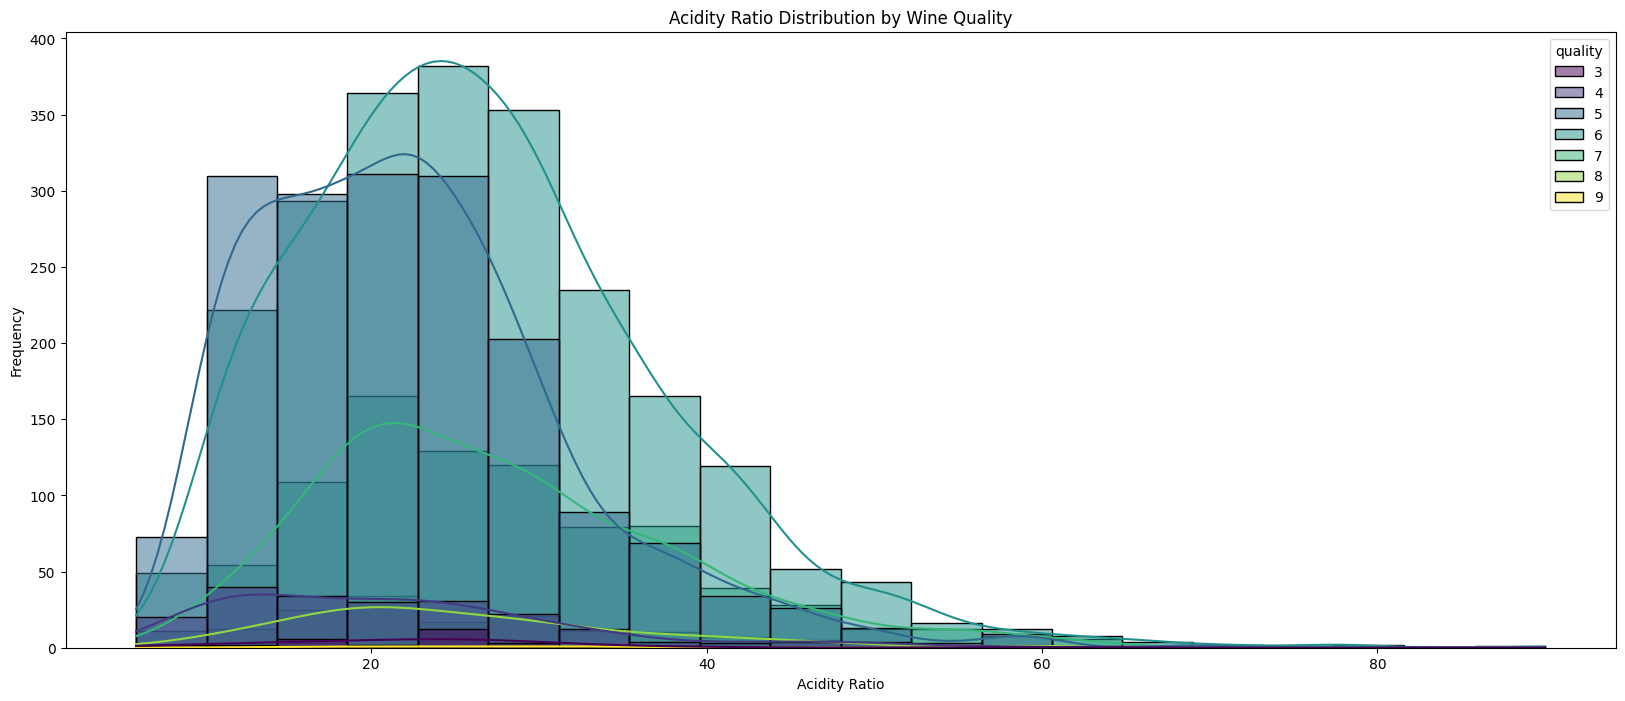

In [480]:
# Plotting the distribution of Acidity Ratio based on Quality
plt.figure(figsize=(20, 8))
sns.histplot(data=df, x='Acidity Ratio', hue='quality', kde=True, bins=20, palette='viridis')
plt.title('Acidity Ratio Distribution by Wine Quality')
plt.xlabel('Acidity Ratio')
plt.ylabel('Frequency')
plt.show()


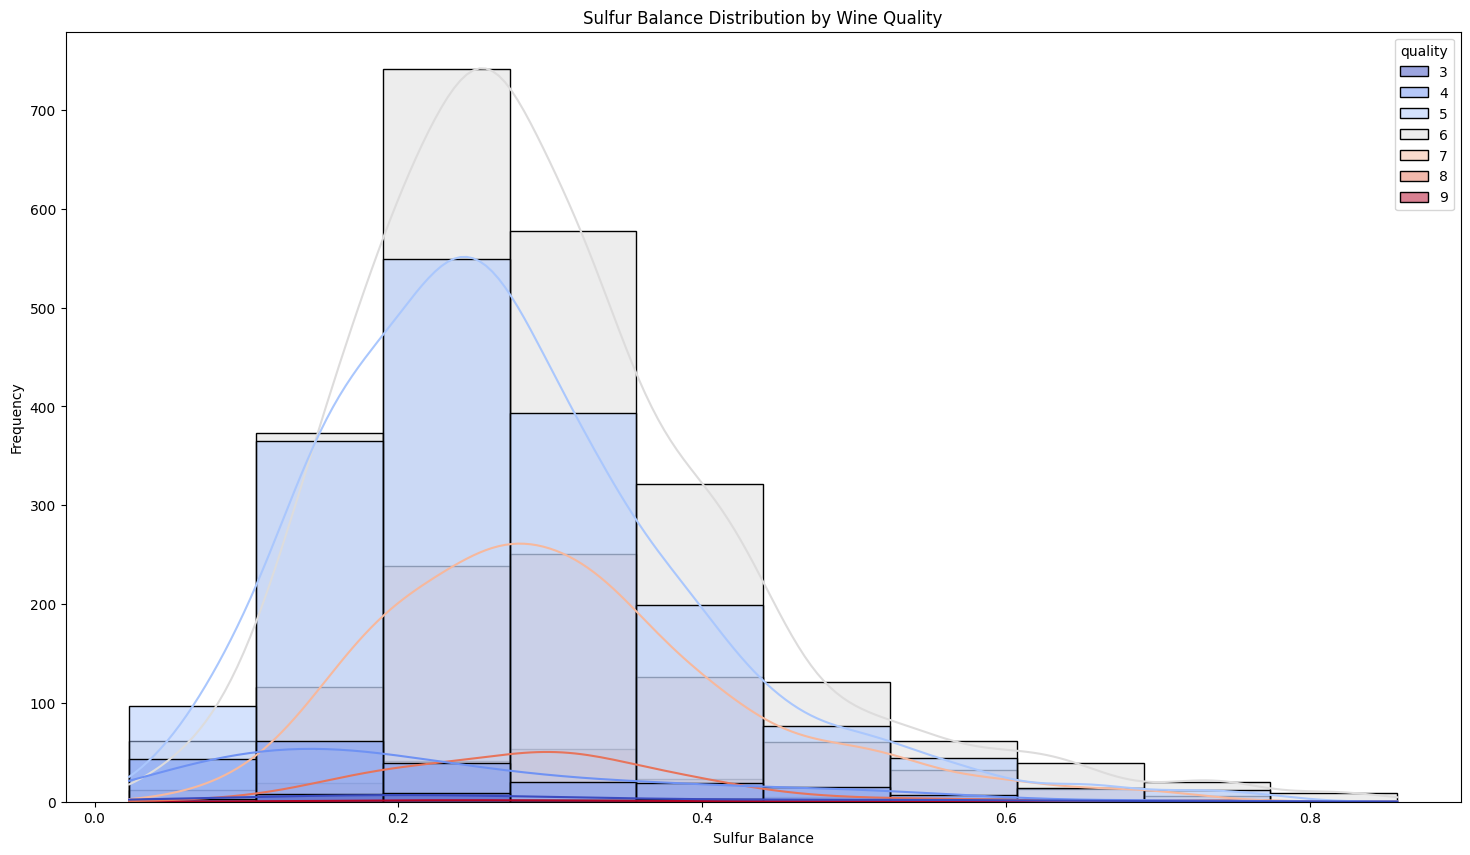

In [481]:
# Plotting the distribution of Sulfur Balance based on Quality
plt.figure(figsize=(18, 10))
sns.histplot(data=df, x='Sulfur Balance', hue='quality', kde=True, bins=10, palette='coolwarm')
plt.title('Sulfur Balance Distribution by Wine Quality')
plt.xlabel('Sulfur Balance')
plt.ylabel('Frequency')
plt.show()


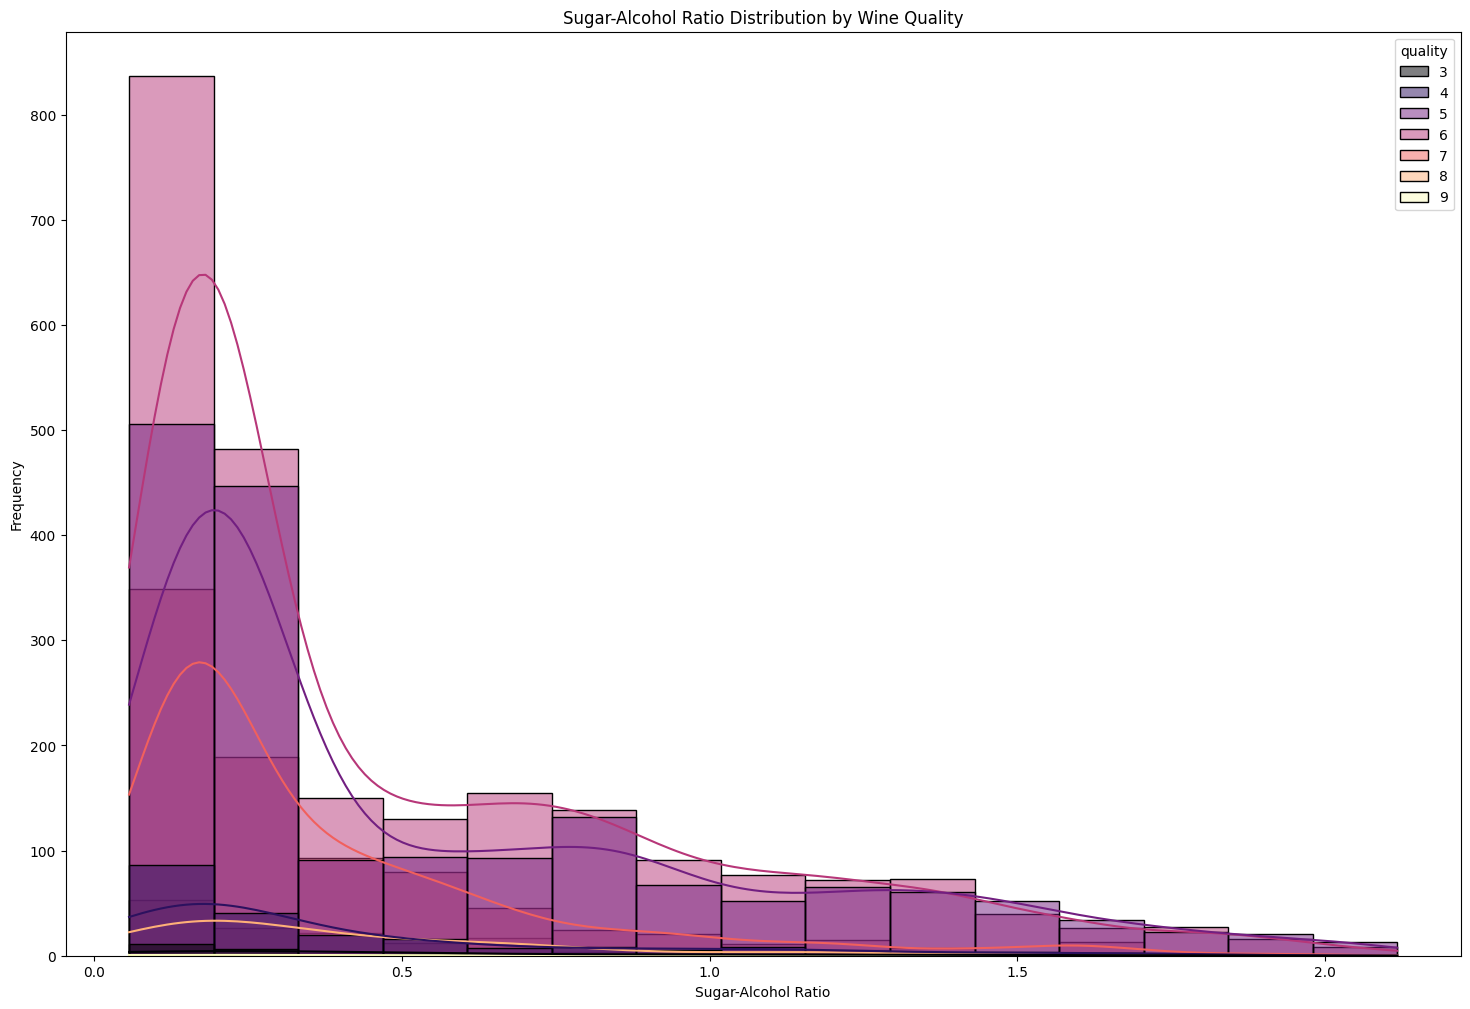

In [482]:
# Plotting the distribution of Sugar-Alcohol Ratio based on Quality
plt.figure(figsize=(18, 12))
sns.histplot(data=df, x='Sugar-Alcohol Ratio', hue='quality', kde=True, bins=15, palette='magma')
plt.title('Sugar-Alcohol Ratio Distribution by Wine Quality')
plt.xlabel('Sugar-Alcohol Ratio')
plt.ylabel('Frequency')
plt.show()


In [483]:
columns_to_normalize = [
    'fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol','pH',
]
scaler = StandardScaler()

# Standardize the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Check the standardized data
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count   5.318000e+03      5.318000e+03  5318.000000     5318.000000   
mean   -5.558213e-16     -4.275549e-17     0.315857        0.000000   
std     1.000094e+00      1.000094e+00     0.141052        1.000094   
min    -3.037280e+00     -1.702559e+00     0.000000       -1.020718   
25%    -6.500325e-01     -6.989557e-01     0.240000       -0.736054   
50%    -9.912911e-02     -2.306074e-01     0.310000       -0.522556   
75%     4.517743e-01      4.384617e-01     0.390000        0.568657   
max     3.665377e+00      3.415819e+00     0.760000        3.225524   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  5.318000e+03         5.318000e+03          5.318000e+03  5.318000e+03   
mean   8.551097e-17        -4.275549e-17         -8.551097e-17  2.458440e-15   
std    1.000094e+00         1.000094e+00          1.000094e+00  1.000094e+00   
min   -1.951412e+00        -1.724689e+00

## Separation of columns to train the model

In [484]:
X = df[[  'volatile acidity', 'alcohol','density','volatile acidity','Acidity Ratio','Sulfur Balance'
     ]]
y = df['quality_category'] 

## Dividing the dataset into two for testing and training the model 

In [485]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=5)


In [486]:
log_reg = LogisticRegression(max_iter=1000) 


### Training the model

In [487]:
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [488]:
y_pred = log_reg.predict(X_test)
print(y_pred)


['Bad' 'Bad' 'Bad' 'Average' 'Average' 'Average' 'Average' 'Average'
 'Average' 'Bad' 'Bad' 'Bad' 'Average' 'Bad' 'Average' 'Average' 'Average'
 'Bad' 'Bad' 'Excellent' 'Average' 'Average' 'Bad' 'Average' 'Bad' 'Bad'
 'Average' 'Bad' 'Bad' 'Average' 'Average' 'Average' 'Excellent' 'Average'
 'Average' 'Bad' 'Bad' 'Excellent' 'Average' 'Average' 'Average' 'Bad'
 'Bad' 'Bad' 'Bad' 'Average' 'Average' 'Excellent' 'Bad' 'Average' 'Bad'
 'Excellent' 'Average' 'Average' 'Excellent' 'Average' 'Average'
 'Excellent' 'Average' 'Bad' 'Average' 'Average' 'Excellent' 'Average'
 'Bad' 'Average' 'Average' 'Bad' 'Average' 'Bad' 'Average' 'Average' 'Bad'
 'Bad' 'Average' 'Excellent' 'Average' 'Average' 'Excellent' 'Average'
 'Average' 'Bad' 'Bad' 'Bad' 'Average' 'Bad' 'Bad' 'Bad' 'Average'
 'Average' 'Bad' 'Bad' 'Average' 'Excellent' 'Average' 'Average' 'Bad'
 'Average' 'Excellent' 'Bad' 'Bad' 'Average' 'Average' 'Average' 'Average'
 'Average' 'Bad' 'Excellent' 'Excellent' 'Average' 'Bad' 'Bad' 'Avera

### Prediction of the wine quality for the 20% test data is given above.

In [489]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 58.40%


In [490]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[219  93  39]
 [ 98 199   2]
 [ 93   7  48]]


In [491]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

     Average       0.53      0.62      0.58       351
         Bad       0.67      0.67      0.67       299
   Excellent       0.54      0.32      0.41       148

    accuracy                           0.58       798
   macro avg       0.58      0.54      0.55       798
weighted avg       0.58      0.58      0.58       798

